# Estadística Aplicada
## Cinthya Yesenia López Díaz 1658003
### Sesión 9 - 3 marzo 2023

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lifelines import KaplanMeierFitter

In [3]:
dic_t = {'tiempo': [12, 19, 20, 20, 33], 
        'evento': [1, 1, 1, 0, 0]}

In [4]:
dic_nt = {'tiempo': [3, 5, 7, 9, 18], 
        'evento': [1, 1, 1, 0, 1]}

In [5]:
# convertir en dataframe los diccionarios
tratamiento = pd.DataFrame(dic_t)
no_trat = pd.DataFrame(dic_nt)

In [6]:
tratamiento

,tiempo,evento
0,12,1
1,19,1
2,20,1
3,20,0
4,33,0


In [7]:
no_trat

,tiempo,evento
0,3,1
1,5,1
2,7,1
3,9,0
4,18,1


In [8]:
km_t = KaplanMeierFitter().fit(tratamiento['tiempo'], tratamiento['evento'])
km_nt = KaplanMeierFitter().fit(no_trat['tiempo'], no_trat['evento'])

In [10]:
km_t.survival_function_

,KM_estimate
timeline,
0.0,1.0
12.0,0.8
19.0,0.6
20.0,0.4
33.0,0.4


In [11]:
km_nt.survival_function_

,KM_estimate
timeline,
0.0,1.0
3.0,0.8
5.0,0.6
7.0,0.4
9.0,0.4
18.0,0.0


In [12]:
km_t.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
12.0,1,1,0,0,5
19.0,1,1,0,0,4
20.0,2,1,1,0,3
33.0,1,0,1,0,1


In [13]:
km_nt.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
3.0,1,1,0,0,5
5.0,1,1,0,0,4
7.0,1,1,0,0,3
9.0,1,0,1,0,2
18.0,1,1,0,0,1


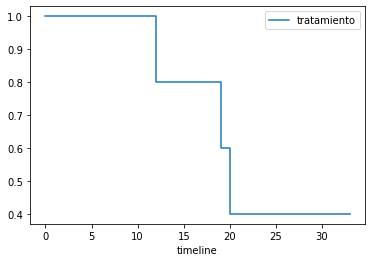

In [15]:
 km_t.plot_survival_function(label='tratamiento',ci_show = False);

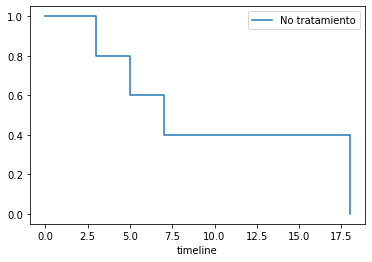

In [16]:
km_nt.plot_survival_function(label = 'No tratamiento',ci_show = False);

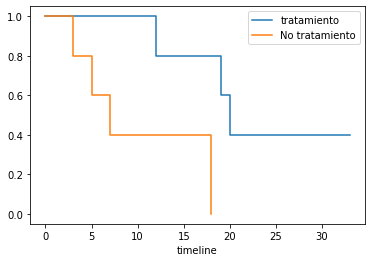

In [17]:
#ci son los intervalos de confianza
km_t.plot_survival_function(label='tratamiento',ci_show = False)
km_nt.plot_survival_function(label = 'No tratamiento',ci_show = False);

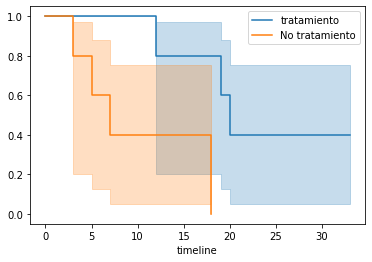

In [18]:
km_t.plot_survival_function(label='tratamiento')
km_nt.plot_survival_function(label = 'No tratamiento');

Ho: S1(t) = S2(t) Funciones de supervivencia son iguales
Ha: S1(t) /= S2(t) funciones de supervivencia distintos

In [20]:
#logRankTest para crear la hipotesis X^2~gl(1)
from lifelines.statistics import logrank_test

In [21]:
lrt_1 = logrank_test(tratamiento['tiempo'], tratamiento['evento'],
                    no_trat['tiempo'], no_trat['evento'])

si p-value < $\alpha$ rechazamos Ho

In [22]:
lrt_1.print_summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.50 0.01      7.34

con un $\alpha = 0.05$ Rechazamos Ho, significa que las funciones de supervivencia son distintas

In [23]:
km_nt.median_survival_time_

7.0

El 50% de los no tratados muere antes del septimo mes

In [24]:
km_t.median_survival_time_

20.0

El 50% de los tratados muere despues del vigesimo mes